In [1]:
import pandas as pd

# Fuentes de datos
data_test = pd.read_csv('../datos/test.csv')
data_train = pd.read_csv('../datos/train.csv')
data_labels = pd.read_csv('../datos/gender_submission.csv')

df_merged = pd.merge(left=data_test, right=data_labels, on='PassengerId', how='left')

list_data_total = [data_train, df_merged]

df_total = pd.concat(list_data_total, ignore_index=True)

In [2]:
# Inspección general EDA

df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [3]:
df_total.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [4]:
(df_total.isna().sum()/1309)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [5]:
# Como el valor de edad esta perdido un 25%, lo reemplazamos con median, para Cabin si lo obviamos porque es el valor de valores nulos es muy grande.
df_total['Age_Missing'] = df_total['Age'].isnull().astype(int)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df_total['Age'] = imputer.fit_transform(df_total[['Age']])


In [6]:
df_prepared = df_total.drop(columns='Cabin')

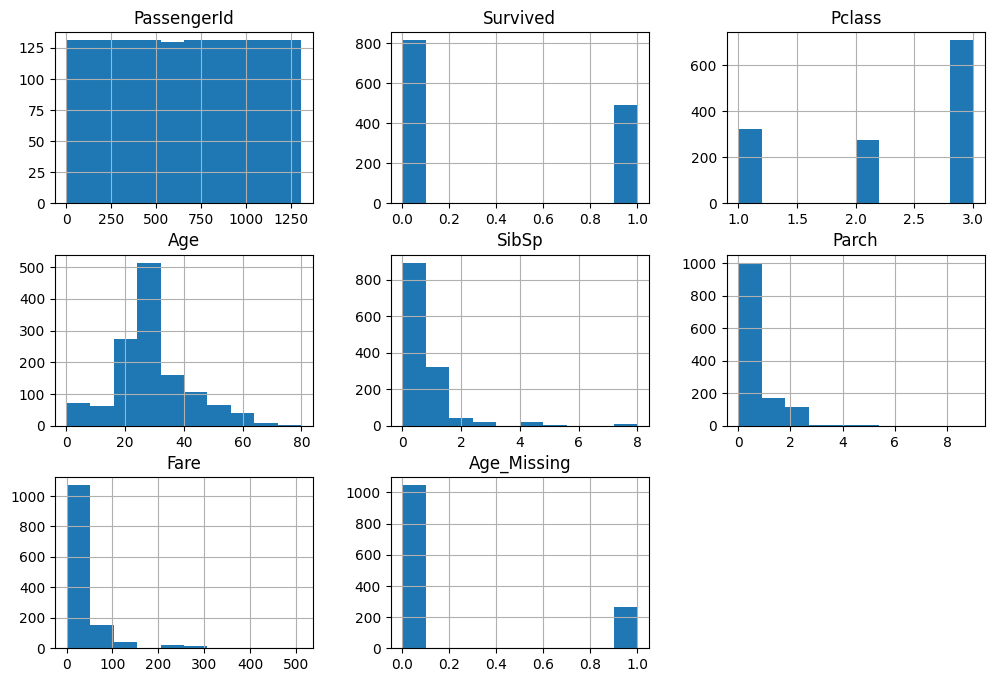

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df_prepared.hist(figsize=(12 , 8))
plt.show()

In [8]:
df_prepared

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S,1
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0
1307,1308,0,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S,1


In [9]:
df_prepared['Sex'].unique()

array(['male', 'female'], dtype=object)

<Axes: xlabel='Sex', ylabel='Age'>

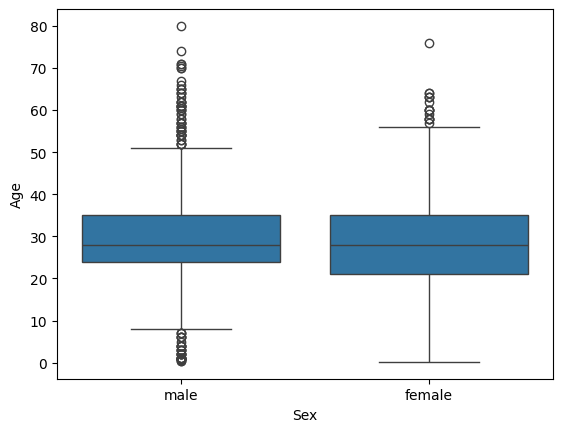

In [11]:
sns.boxplot(x=df_prepared['Sex'], y=df_prepared['Age'])

In [24]:
df_prepared_2 = df_prepared.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [ ]:
# Ahora toca tratar numericos, categorica con pipelines, para esto tengo que estudiar esta parte con Hans on Machine Learning.